In [1]:
import ai2thor
import copy
import time
import random
import ai2thor.controller
from datetime import datetime
import cv2
import os
import matplotlib.pyplot as plt
import os
# from utils.mid_level_constants import  scene_start_cheating_init_pose
from jupyter_helper import ENV_ARGS, initialize_arm, only_reset_scene, transport_wrapper, ADITIONAL_ARM_ARGS, execute_command

screen_size=900

ENV_ARGS['width'] = screen_size
ENV_ARGS['height'] = screen_size
controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True, commit_id='eb294caf07779adf32fe4844ab3ab853b655ed52')
controller._build.url

thor-OSXIntel64-eb294caf07779adf32fe4844ab3ab853b655ed52.zip: [ 100%  34.1 MiB/s]  of 518.MB


'http://s3-us-west-2.amazonaws.com/ai2-thor-public/builds/thor-OSXIntel64-eb294caf07779adf32fe4844ab3ab853b655ed52.zip'

In [7]:
def translate(action):
    translation = {
        'MoveArmHeightM': 'j',
        'MoveArmHeightP': 'u',
        'MoveArmXM': 'a',
        'MoveArmXP': 's',
        'MoveArmZM': 'z',
        'MoveArmZP': 'w',
        'MoveArmYM': '4',
        'MoveArmYP': '3',
        'MoveAhead': 'm',
        'RotateRight': 'r',
        'RotateLeft': 'l',
        '':'',
        'Done':'q',
        'PickUp':'p', 
        'Finish': 'q',
        'Drop': 'd',
    }
    return translation[action]

def run_action_sequence(controller, action_sequence, object_id=None, target_location=None, logger_number=0, translated=False, seq_num_start = 0):
    picked_up = False
    if translated:
        translated_sequence = action_sequence
    else:
        translated_sequence = [translate(action) for action in action_sequence if action != '']
    for (seq_number, seq) in enumerate(translated_sequence):
        execute_command(controller, seq,ADITIONAL_ARM_ARGS)
                
def manual_task(scene_name, logger_number =0, final=False, reverse=False, reset=True):
    if reset:
        only_reset_scene(controller, scene_name)
    all_actions = []
    actions_ran_so_far = 0
    while(True):
        action = input()
        if not reverse:
            action = translate(action)
        if action == 'q':
            break
        all_actions.append(action)
        
        run_action_sequence(controller, [action], 
                            logger_number=logger_number, translated=True, seq_num_start=actions_ran_so_far)
        actions_ran_so_far += 1
        plt.cla()
        plt.imshow(controller.last_event.frame)
        plt.show()
        
    print(scene_name)
    print(all_actions)

m


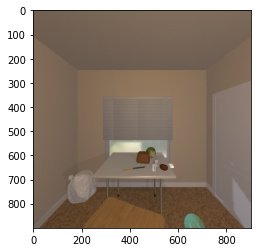

m


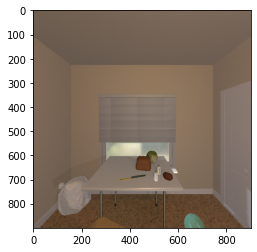

m


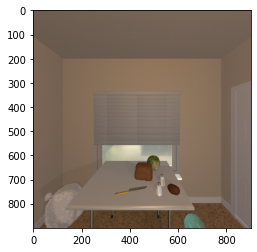

r


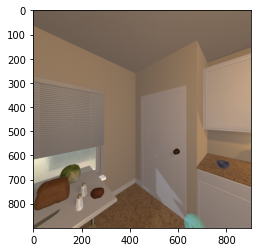

u


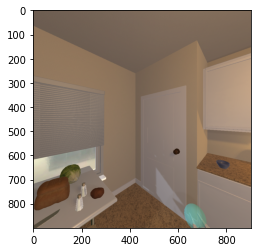

u


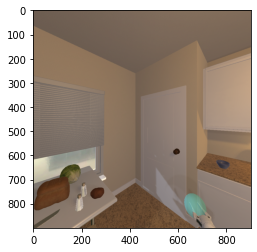

u


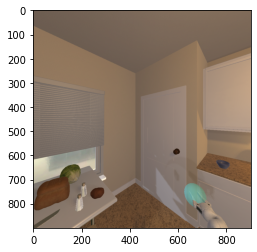

s


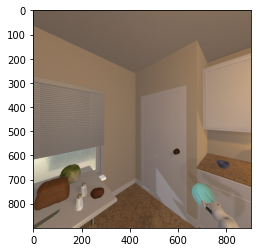

s


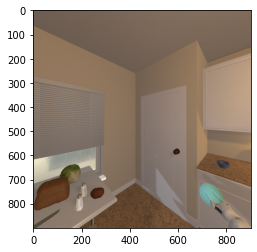

s


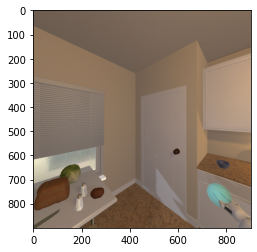

s


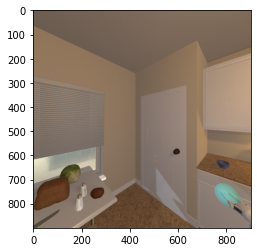

m


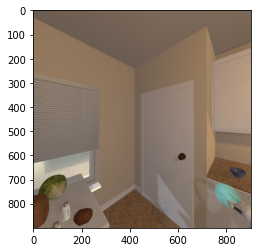

m


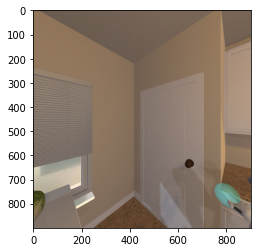

l


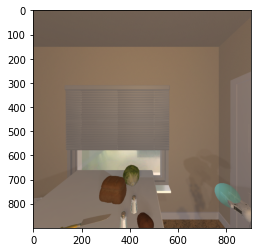

l


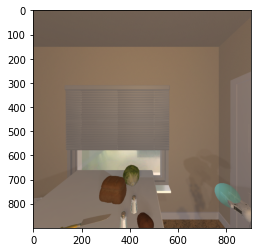

l


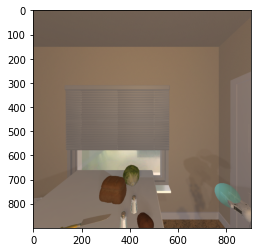

a


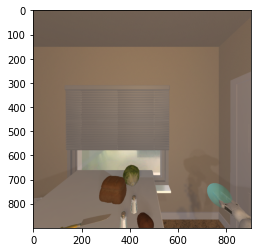

a


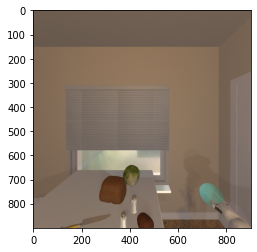

a


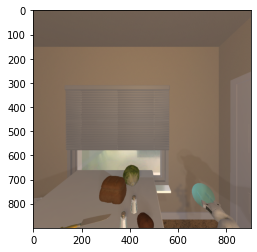

a


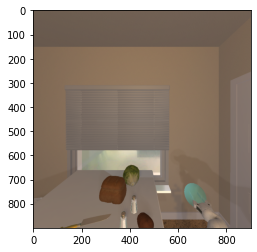

a


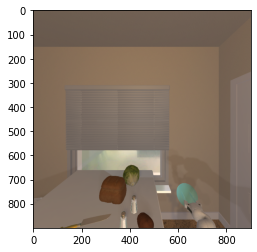

a


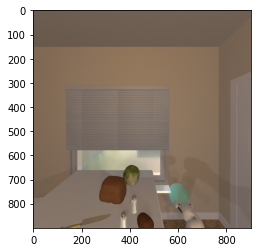

a


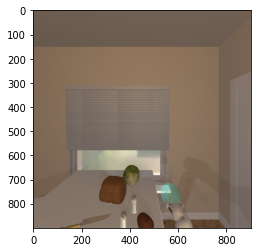

a


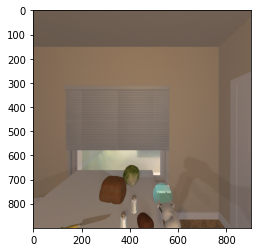

a


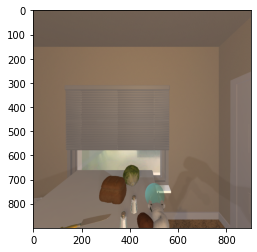

4


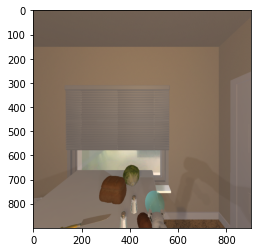

3


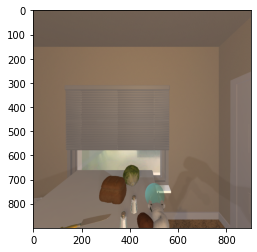

3


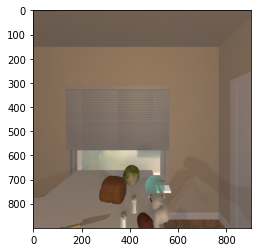

3


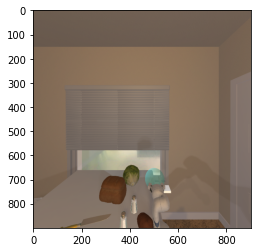

3


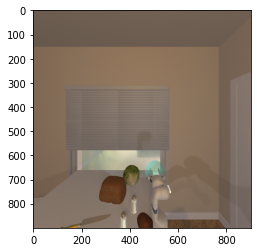

3


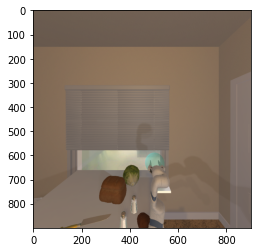

3


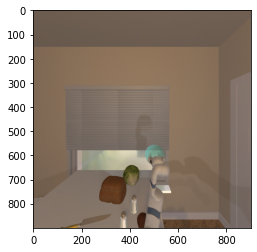

4


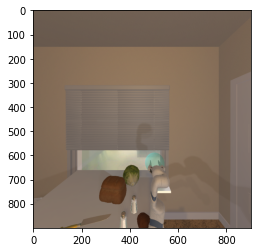

4


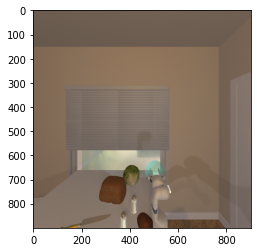

4


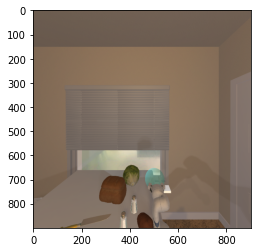

4


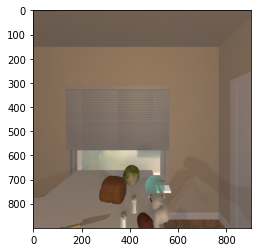

4


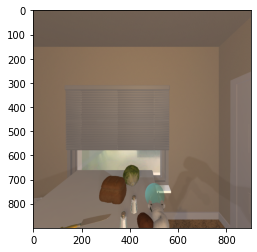

4


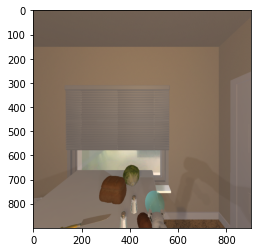

4


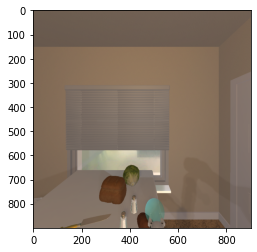

a


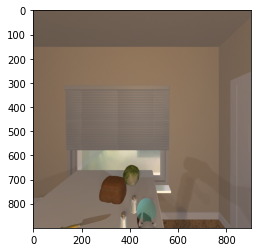

w


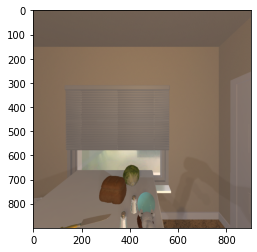

j


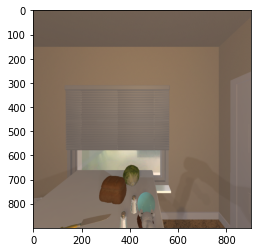

j


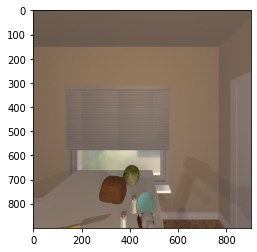

4


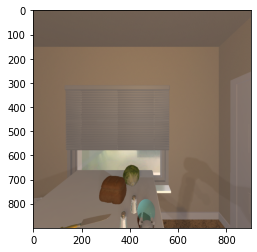

/
['Potato|-01.80|+00.91|+00.52']


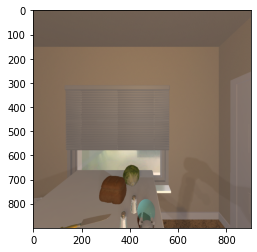

p


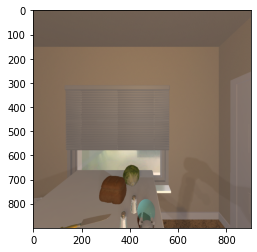

u


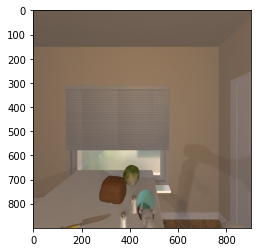

u


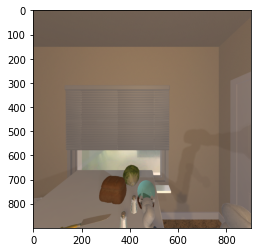

a


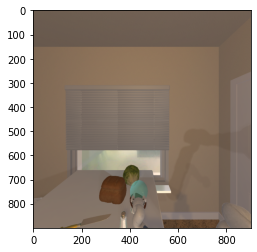

w


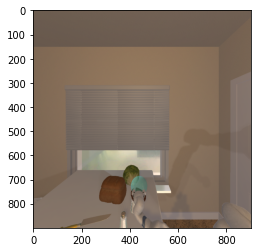

w


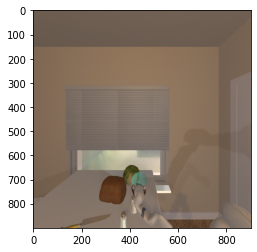

w


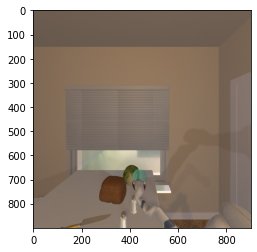

a


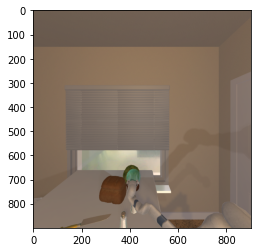

a


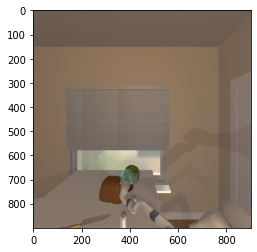

a


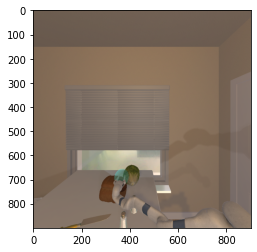

a


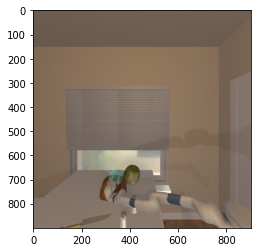

w


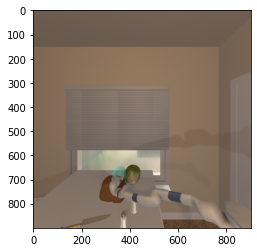

w


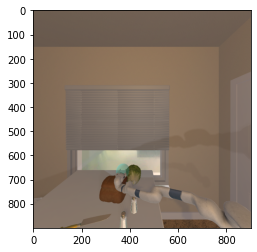

w


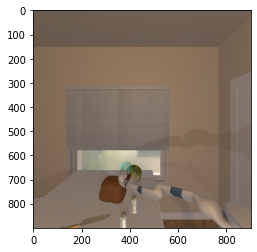

w


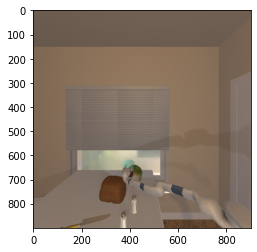

w


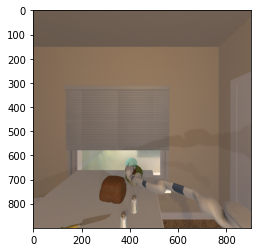

w


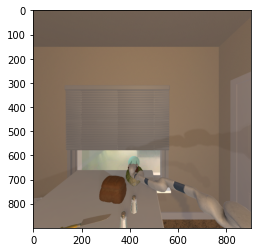

j


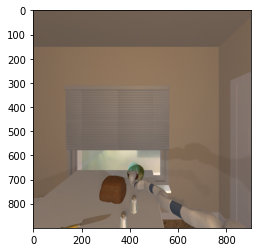

j


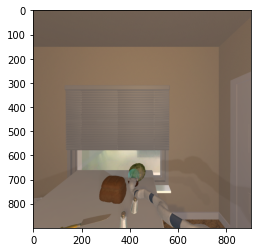

a


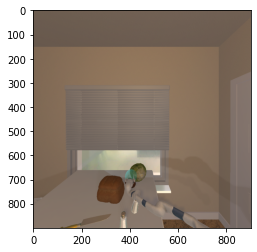

a


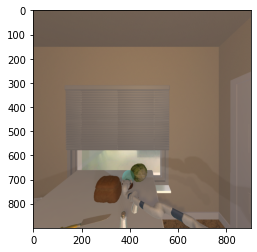

a


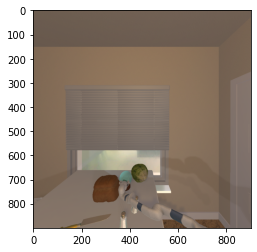

a


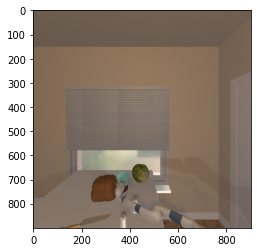

s


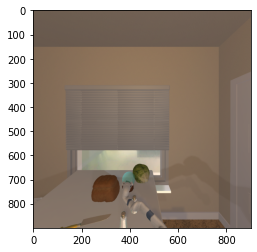

s


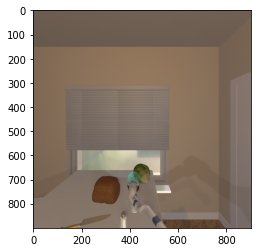

q
FloorPlan15_physics
['m', 'm', 'm', 'r', 'u', 'u', 'u', 's', 's', 's', 's', 'm', 'm', 'l', 'l', 'l', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', '4', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', 'a', 'w', 'j', 'j', '4', '/', 'p', 'u', 'u', 'a', 'w', 'w', 'w', 'a', 'a', 'a', 'a', 'w', 'w', 'w', 'w', 'w', 'w', 'j', 'j', 'a', 'a', 'a', 'a', 's', 's']


In [3]:
manual_task(scene_name='FloorPlan15_physics', reverse=True)
sequence_tried = ['m', 'm', 'm', 'r', 'u', 'u', 'u', 's', 's', 's', 's', 'm', 'm', 'l', 'l', 'l', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', '4', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', 'a', 'w', 'j', 'j', '4', '/', 'p', 'u', 'u', 'a', 'w', 'w', 'w', 'a', 'a', 'a', 'a', 'w', 'w', 'w', 'w', 'w', 'w', 'j', 'j', 'a', 'a', 'a', 'a', 's', 's']

In [55]:

obj_id = 'Pot|-03.14|+00.96|+02.37'
obj_position = {'x': -2.0963223457336426,
   'y': 0.9608616232872009,
   'z': 3.5968814373016357}
transport_wrapper(controller, obj_id, obj_position)
# controller.last_event.objects_by_type('Tomato')

(<ai2thor.server.Event at 0x116a83dd8
     .metadata["lastAction"] = PlaceObjectAtPoint
     .metadata["lastActionSuccess"] = True
     .metadata["errorMessage"] = "
     .metadata["actionReturn"] = None
 >,
 [{'action': 'PlaceObjectAtPoint',
   'objectId': 'Pot|-03.14|+00.96|+02.37',
   'position': {'x': -2.0963223457336424,
    'y': 0.9608616232872009,
    'z': 3.5968814373016356},
   'forceKinematic': True},
  {'action': 'AdvancePhysicsStep', 'simSeconds': 1.0}])

In [5]:
controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True)


In [9]:
scene_name = 'FloorPlan15_physics'
sequence_tried = ['m', 'm', 'm', 'r', 'u', 'u', 'u', 's', 's', 's', 's', 'm', 'm', 'l', 'l', 'l', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', '4', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', 'a', 'w', 'j', 'j', '4', '/', 'p', 'u', 'u', 'a', 'w', 'w', 'w', 'a', 'a', 'a', 'a', 'w', 'w', 'w', 'w', 'w', 'w', 'j', 'j', 'a', 'a', 'a', 'a', 's', 's']
only_reset_scene(controller, scene_name)
run_action_sequence(controller, sequence_tried, translated=True)

['Potato|-01.80|+00.91|+00.52']


a


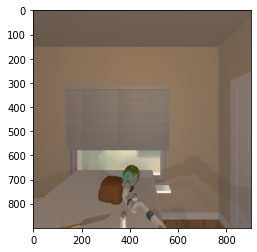

a


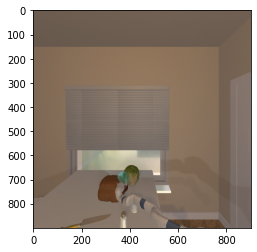

a


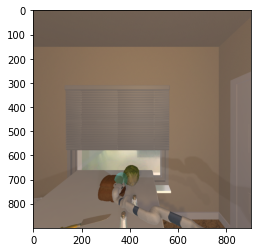

a


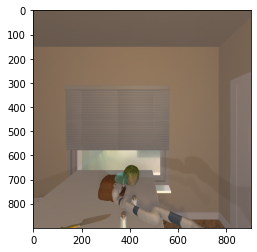

a


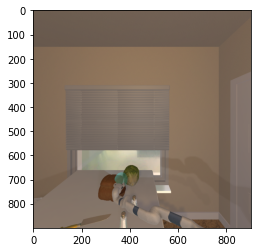

a


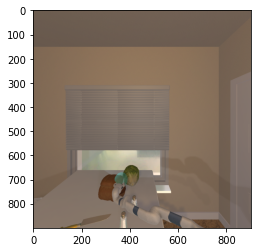

w


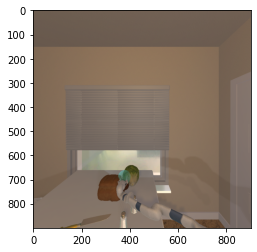

w


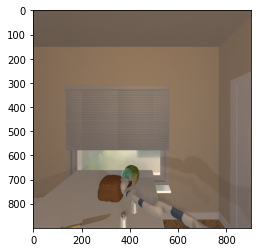

a


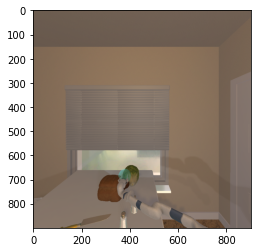

s


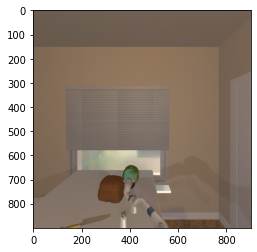

w


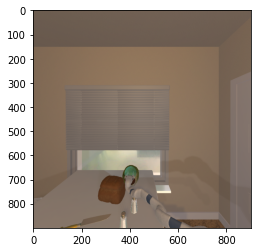

w


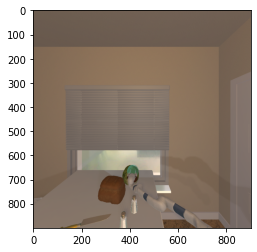

w


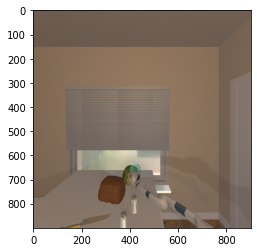

w


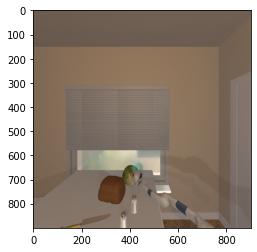

w


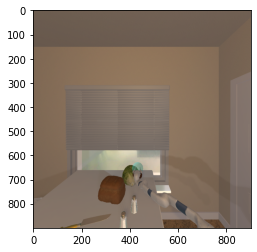

mm


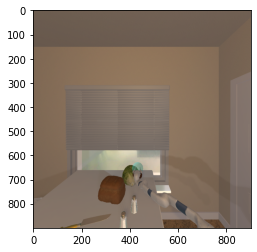

w


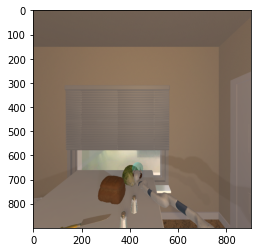

s


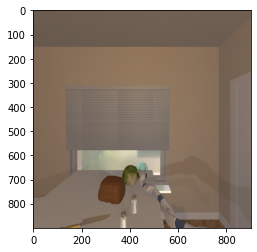

z


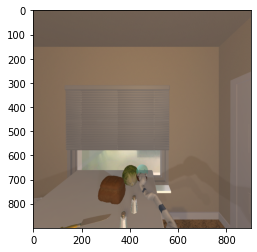

j


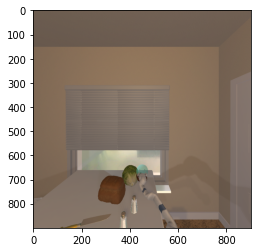

j


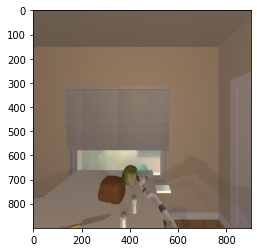

s


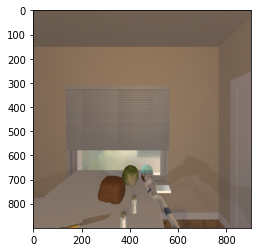

4


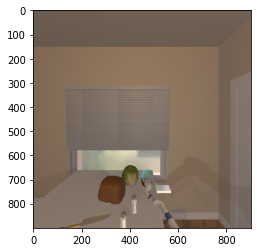

4


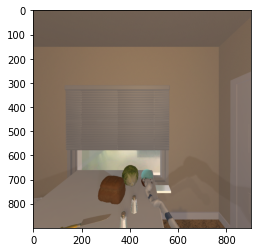

4


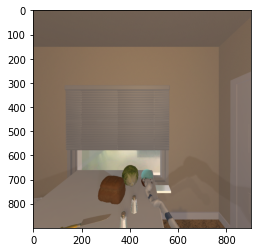

4


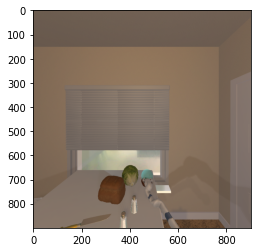

a


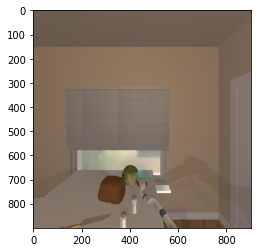

a


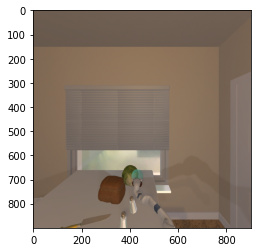

z


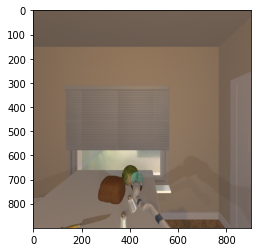

z


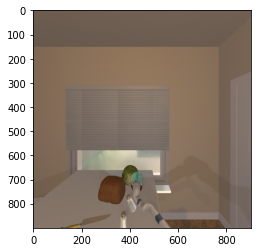

z


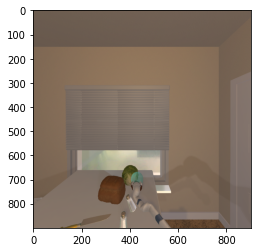

z


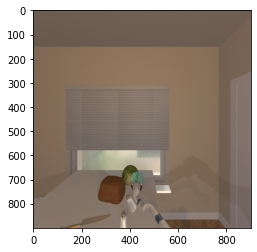

s


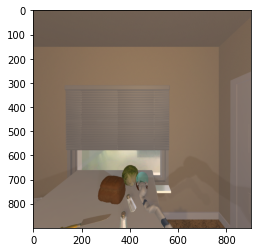

s


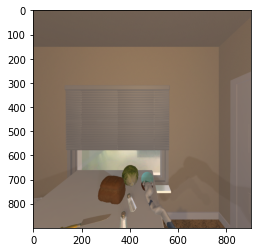

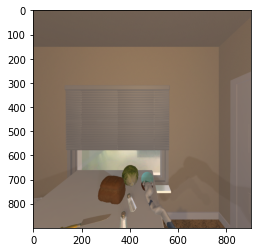

z


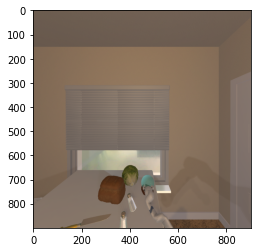

z


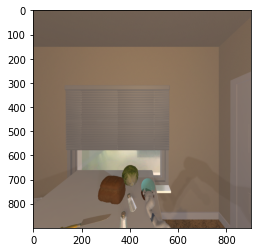

a


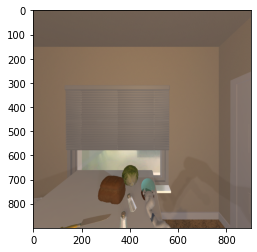

a


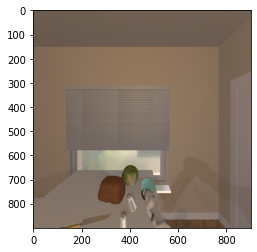

a


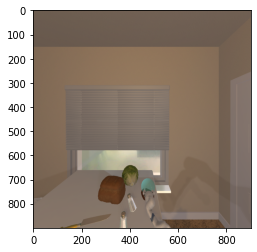

a


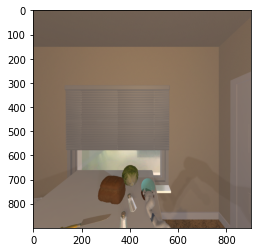

q
FloorPlan15_physics
['a', 'a', 'a', 'a', 'a', 'a', 'w', 'w', 'a', 's', 'w', 'w', 'w', 'w', 'w', 'mm', 'w', 's', 'z', 'j', 'j', 's', '4', '4', '4', '4', 'a', 'a', 'z', 'z', 'z', 'z', 's', 's', '', 'z', 'z', 'a', 'a', 'a', 'a']


In [11]:
manual_task(scene_name='FloorPlan15_physics', reverse=True, reset=False)